In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # For any calcs
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lizexi/singapore-public-housing-dataset")

print("Path to dataset files:", path)

# List files (helps spot the CSV)
import os
print("Files in dataset:", os.listdir(path))

# Set style for pretty plots
plt.style.use('seaborn-v0_8')  # Or 'default' if error
sns.set_palette("husl")  # Nice colors
%matplotlib inline  

Path to dataset files: C:\Users\shinb\.cache\kagglehub\datasets\lizexi\singapore-public-housing-dataset\versions\4
Files in dataset: ['all_DisToTop50School.csv', 'all_geocoded.csv', 'all_with_Drive_Walk_Dis.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv', 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv']


In [20]:
import pandas as pd

# Load the main resale CSV (adjust filename if needed from print above)
csv_path = os.path.join(
    path,
    "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
)
df = pd.read_csv(csv_path)

# Quick peek
print(df.shape)  # ~200k rows, 24 cols
print(df.head())
print(df.info())

(77895, 11)
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3 

In [23]:
# Singapore HDB Affordability Analysis
# Personal project: Visualizing resale flat prices (2017-2020) using automated KaggleHub download.
# Dataset: [Kaggle Singapore Public Housing](https://www.kaggle.com/datasets/lizexi/singapore-public-housing-dataset)

In [24]:
# Convert month to datetime
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Add year and price per sqm
df['year'] = df['month'].dt.year
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

# Drop rows with missing prices/area
df = df.dropna(subset=['resale_price', 'floor_area_sqm'])

# Summary stats
print(df.describe())
print(f"Data from {df['year'].min()} to {df['year'].max()}")

                               month  floor_area_sqm  lease_commence_date  \
count                          77895    77895.000000         77895.000000   
mean   2018-10-28 08:12:03.188908288       97.612341          1994.039155   
min              2017-01-01 00:00:00       31.000000          1966.000000   
25%              2017-12-01 00:00:00       82.000000          1984.000000   
50%              2018-11-01 00:00:00       95.000000          1994.000000   
75%              2019-10-01 00:00:00      113.000000          2003.000000   
max              2020-08-01 00:00:00      249.000000          2019.000000   
std                              NaN       24.295162            12.783561   

       resale_price          year  price_per_sqm  
count  7.789500e+04  77895.000000   77895.000000  
mean   4.386677e+05   2018.371718    4525.005871  
min    1.400000e+05   2017.000000    2089.552239  
25%    3.300000e+05   2017.000000    3729.508197  
50%    4.080000e+05   2018.000000    4226.415094  


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for pretty plots
plt.style.use('seaborn-v0_8')  # Or 'default' if error
sns.set_palette("husl")
%matplotlib inline

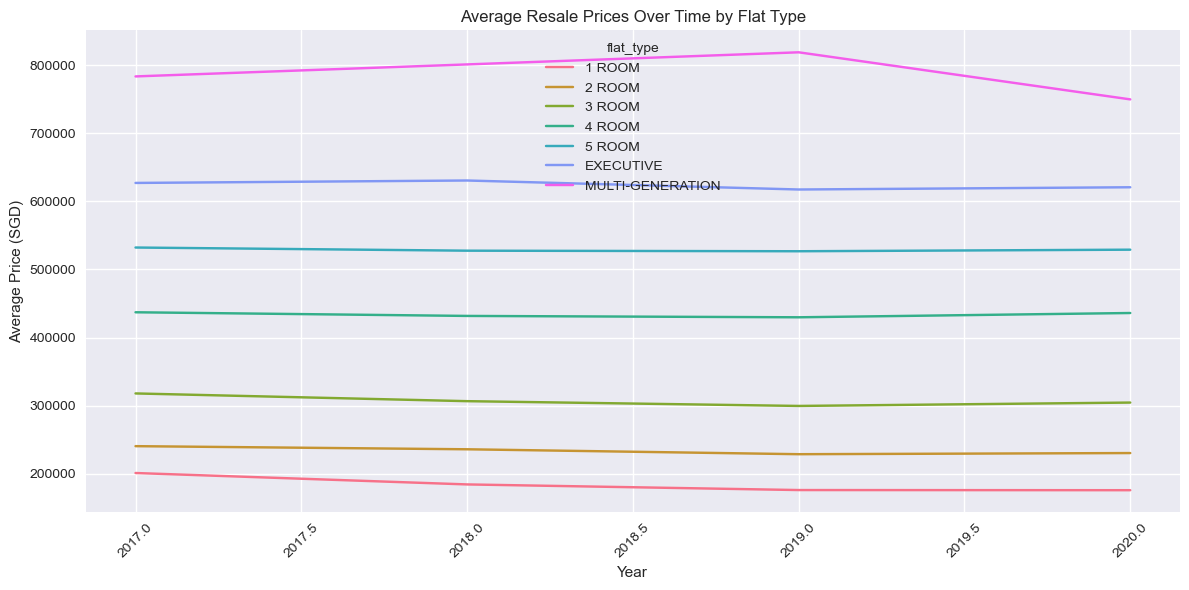

In [26]:
# Group for averages
time_trend = df.groupby(['year', 'flat_type'])['resale_price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_trend, x='year', y='resale_price', hue='flat_type')
plt.title('Average Resale Prices Over Time by Flat Type')
plt.ylabel('Average Price (SGD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

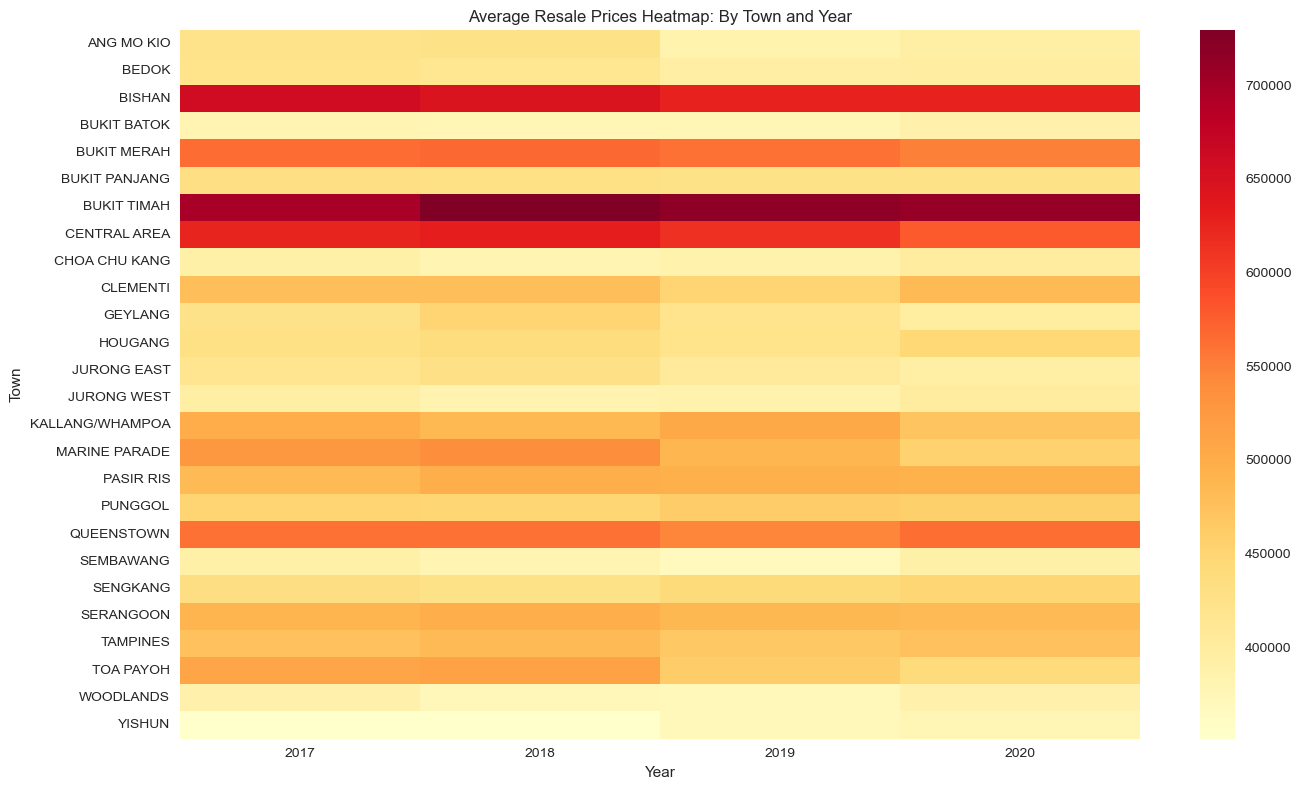

In [27]:
# Pivot for heatmap
heat_data = df.groupby(['town', 'year'])['resale_price'].mean().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heat_data, annot=False, cmap='YlOrRd', fmt='.0f')
plt.title('Average Resale Prices Heatmap: By Town and Year')
plt.ylabel('Town')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

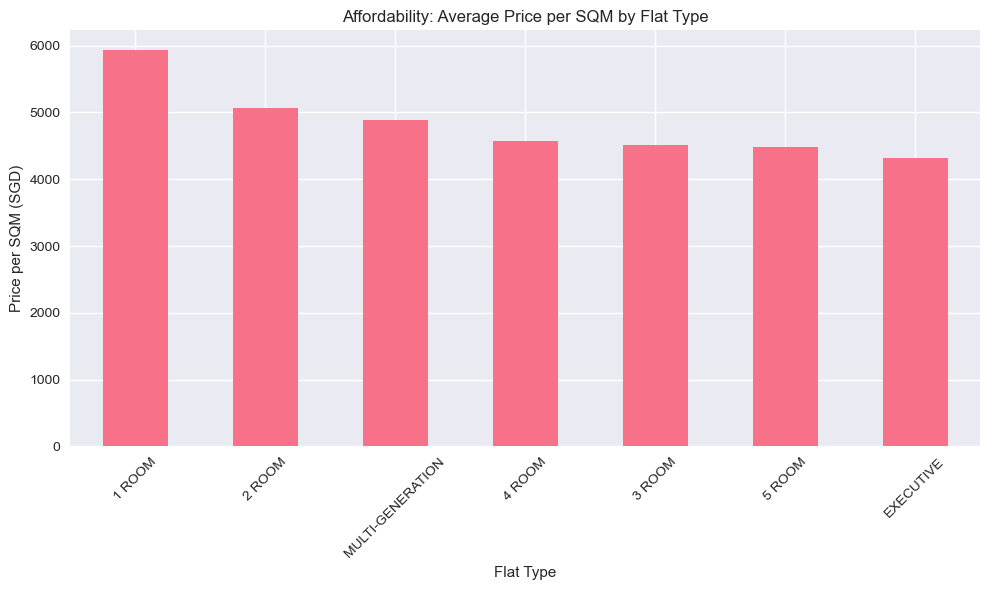

flat_type
1 ROOM              5932.230166
2 ROOM              5072.728004
MULTI-GENERATION    4885.673242
4 ROOM              4570.160909
3 ROOM              4512.174293
5 ROOM              4489.534248
EXECUTIVE           4323.497322
Name: price_per_sqm, dtype: float64


In [28]:
# Average price per sqm
affordability = df.groupby('flat_type')['price_per_sqm'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
affordability.plot(kind='bar')
plt.title('Affordability: Average Price per SQM by Flat Type')
plt.ylabel('Price per SQM (SGD)')
plt.xlabel('Flat Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quick insight
print(affordability)

In [29]:
print(df[['resale_price', 'floor_area_sqm', 'price_per_sqm', 'year']].corr())

                resale_price  floor_area_sqm  price_per_sqm      year
resale_price        1.000000        0.633208       0.688048 -0.022988
floor_area_sqm      0.633208        1.000000      -0.103090 -0.016570
price_per_sqm       0.688048       -0.103090       1.000000 -0.015958
year               -0.022988       -0.016570      -0.015958  1.000000
